# **Data Loading & Preprocessing**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [55]:
df_es = pd.read_csv('ES.csv')

In [57]:
df_es

,Date,Time,Open,High,Low,Close,Volume,Tick Count
0,09/10/1997,00:01,0.00,0.00,0.00,0.00,0,0
1,09/10/1997,00:02,0.00,0.00,0.00,0.00,0,0
2,09/10/1997,00:03,0.00,0.00,0.00,0.00,0,0
3,09/10/1997,00:04,0.00,0.00,0.00,0.00,0,0
4,09/10/1997,00:05,0.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
9682630,12/19/2024,15:56,5941.75,5942.00,5941.25,5941.75,318,79
9682631,12/19/2024,15:57,5941.75,5942.00,5941.25,5941.50,386,100
9682632,12/19/2024,15:58,5941.50,5941.50,5940.75,5941.00,484,122
9682633,12/19/2024,15:59,5940.75,5941.25,5940.75,5941.00,6462,138


In [5]:
df_surprise = pd.read_csv('US_economic_releases_events.csv')

C:\Users\Jop Brouwer\AppData\Local\Temp\ipykernel_2444\1241424920.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_surprise = pd.read_csv('US_economic_releases_events.csv')


In [6]:
df_surprise

,Unnamed: 0,Period,Event,Ticker,Actual,Prior,Revised,S,Freq.,First Rev.,...,Month,Surv(A),Surv(H),Surv(L),Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag
0,1997-01-02,Dec,ISM Manufacturing,NAPMPMI Index,55.2,53,--,94.81480,M,--,...,Jan,--,--,--,--,0.0,--,--,United States,United States
1,1997-01-03,Nov,Construction Spending,VNCCTOT Index,1.9$,1.8$,1.5$,0.00000,M,1.5$,...,Jan,-0.40$,--,--,-0.40$,0.0,--,--,United States,United States
2,1997-01-06,Dec,Housing Completions,PHUCCHNG Index,2k,-1k,--,0.00000,M,--,...,Jan,--,--,--,--,0.0,--,--,United States,United States
3,1997-01-07,Nov,Factory Orders,TMNOCHNG Index,-0.004,0.009,0.011,84.44440,M,0.011,...,Jan,-0.007,--,--,-0.007,0.0,--,--,United States,United States
4,1997-01-08,Dec,Consumer Credit,CICRTOT Index,$7.400b,$2.200b,--,42.96300,M,--,...,Jan,$3.60b,--,--,$3.60b,0.0,--,--,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36053,2024-12-31,Oct,FHFA House Price Index MoM,HPIMMOM% Index,--,0.007,--,68.88890,M,--,...,Dec,--,--,--,--,0.0,--,--,United States,United States
36054,2024-12-31,Oct,S&P CoreLogic CS 20-City MoM SA,SPCS20SM Index,--,0.0018,--,30.37040,M,--,...,Dec,--,--,--,--,1.0,--,--,United States,United States
36055,2024-12-31,Oct,S&P CoreLogic CS 20-City YoY NSA,SPCS20Y% Index,--,0.0457,--,40.74070,M,--,...,Dec,--,--,--,--,1.0,--,--,United States,United States
36056,2024-12-31,Oct,S&P CoreLogic CS US HPI YoY NSA,SPCSUSAY Index,--,0.0389,--,35.55560,M,--,...,Dec,--,--,--,--,0.0,--,--,United States,United States


In [7]:
df_surprise.drop(columns=['S', 'Month', 'Surv(A)', 'Surv(H)', 'Surv(L)',], inplace=True)

In [8]:
df_surprise.columns

Index(['Unnamed: 0', 'Period', 'Event', 'Ticker', 'Actual', 'Prior', 'Revised',
       'Freq.', 'First Rev.', 'Last Rev.', 'Date', 'Time', 'C', 'Category',
       'Subcategory', 'R', 'Day', 'Surv(M)', '# Ests.', 'Std Dev', 'Surprise',
       'Country/Region', 'Flag'],
      dtype='object')

In [9]:
df_surprise.drop(columns=['Flag', 'Country/Region', 'Day'])

,Unnamed: 0,Period,Event,Ticker,Actual,Prior,Revised,Freq.,First Rev.,Last Rev.,Date,Time,C,Category,Subcategory,R,Surv(M),# Ests.,Std Dev,Surprise
0,1997-01-02,Dec,ISM Manufacturing,NAPMPMI Index,55.2,53,--,M,--,--,1997-01-02 00:00:00,09:00:00,US,Economic Releases,NaN,94.81480,--,0.0,--,--
1,1997-01-03,Nov,Construction Spending,VNCCTOT Index,1.9$,1.8$,1.5$,M,1.5$,--,1997-01-03 00:00:00,09:00:00,US,Economic Releases,NaN,0.00000,-0.40$,0.0,--,--
2,1997-01-06,Dec,Housing Completions,PHUCCHNG Index,2k,-1k,--,M,--,--,1997-01-06 00:00:00,09:00:00,US,Economic Releases,NaN,0.00000,--,0.0,--,--
3,1997-01-07,Nov,Factory Orders,TMNOCHNG Index,-0.004,0.009,0.011,M,0.011,-0.001,1997-01-07 00:00:00,09:00:00,US,Economic Releases,NaN,84.44440,-0.007,0.0,--,--
4,1997-01-08,Dec,Consumer Credit,CICRTOT Index,$7.400b,$2.200b,--,M,--,$6.064b,1997-01-08 00:00:00,14:00:00,US,Economic Releases,NaN,42.96300,$3.60b,0.0,--,--
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36053,2024-12-31,Oct,FHFA House Price Index MoM,HPIMMOM% Index,--,0.007,--,M,--,--,2024-12-31 00:00:00,08:00:00,US,Economic Releases,NaN,68.88890,--,0.0,--,--
36054,2024-12-31,Oct,S&P CoreLogic CS 20-City MoM SA,SPCS20SM Index,--,0.0018,--,M,--,--,2024-12-31 00:00:00,08:00:00,US,Economic Releases,NaN,30.37040,--,1.0,--,--
36055,2024-12-31,Oct,S&P CoreLogic CS 20-City YoY NSA,SPCS20Y% Index,--,0.0457,--,M,--,--,2024-12-31 00:00:00,08:00:00,US,Economic Releases,NaN,40.74070,--,1.0,--,--
36056,2024-12-31,Oct,S&P CoreLogic CS US HPI YoY NSA,SPCSUSAY Index,--,0.0389,--,M,--,--,2024-12-31 00:00:00,08:00:00,US,Economic Releases,NaN,35.55560,--,0.0,--,--


In [10]:
# Dropping all rows for which surprise column has NaN or 0 value
df_surprise.dropna(subset=['Surprise'], inplace=True)
df_surprise = df_surprise[df_surprise['Surprise'] != 0]


In [11]:

nan_count = df_surprise['Surprise'].isnull().sum()
print(f"Number of NaN values in 'Surprise' column: {nan_count}")


Number of NaN values in 'Surprise' column: 0


In [12]:
print(df_surprise.isna().sum())

Unnamed: 0            0
Period                0
Event                 0
Ticker                0
Actual                0
Prior                 0
Revised               0
Freq.                 0
First Rev.            0
Last Rev.             0
Date                  0
Time                325
C                     0
Category              0
Subcategory       35186
R                     0
Day                  25
Surv(M)               0
# Ests.               0
Std Dev               0
Surprise              0
Country/Region        0
Flag                  0
dtype: int64


In [13]:
df_surprise.replace("--", pd.NA, inplace=True)


print(df_surprise.isna().sum())

Unnamed: 0            0
Period                0
Event                 0
Ticker                0
Actual              987
Prior               980
Revised           17228
Freq.                 0
First Rev.        17228
Last Rev.         10752
Date                  0
Time                325
C                     0
Category              0
Subcategory       35186
R                     0
Day                  25
Surv(M)            6942
# Ests.               0
Std Dev            7539
Surprise           8564
Country/Region        0
Flag                  0
dtype: int64


C:\Users\Jop Brouwer\AppData\Local\Temp\ipykernel_2444\2459805912.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_surprise.replace("--", pd.NA, inplace=True)


In [14]:
# Redoing dropping all rows for which surprise column has NaN or 0 value
df_surprise.dropna(subset=['Surprise'], inplace=True)
df_surprise = df_surprise[df_surprise['Surprise'] != 0]


In [15]:
df_surprise

,Unnamed: 0,Period,Event,Ticker,Actual,Prior,Revised,Freq.,First Rev.,Last Rev.,...,Category,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag
8,1997-01-10,Dec,Unemployment Rate,USURTOT Index,0.053,0.054,0.053,M,0.053,<NA>,...,Economic Releases,NaN,89.333300,Fri,0.053,10.0,0.07,0,United States,United States
153,1997-06-25,1Q F,GDP Annualized QoQ,GDP CQOQ Index,0.059,0.058,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Wed,0.058,13.0,0.22,0.45,United States,United States
198,1997-08-01,Jul,Change in Nonfarm Payrolls,NFP TCH Index,316k,217k,228k,M,228k,265k,...,Economic Releases,NaN,99.259300,Fri,70k,20.0,33.84,7.27,United States,United States
394,1997-12-23,3Q F,GDP Annualized QoQ,GDP CQOQ Index,0.031,0.033,<NA>,Q,<NA>,0.051,...,Economic Releases,NaN,96.296300,Tue,0.033,11.0,0.07,-2.98,United States,United States
523,1998-03-26,4Q F,GDP Annualized QoQ,GDP CQOQ Index,0.037,0.039,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Thu,0.039,22.0,0.08,-2.52,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35998,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: Current Yr,DOTDY0MD Index,0.04375,0.04375,<NA>,D,<NA>,<NA>,...,Economic Releases,NaN,2.962960,Wed,0.04375,9.0,0,0,United States,United States
35999,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: Next Yr,DOTDY1MD Index,0.03875,0.03375,<NA>,D,<NA>,<NA>,...,Economic Releases,NaN,2.222220,Wed,0.03625,12.0,0.12,2.03,United States,United States
36000,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: +2 Yrs,DOTDY2MD Index,0.03375,0.02875,<NA>,D,<NA>,<NA>,...,Economic Releases,NaN,0.740741,Wed,0.03125,11.0,0.11,2.35,United States,United States
36001,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: +3 Yrs,DOTDY3MD Index,0.03125,0.02875,<NA>,D,<NA>,<NA>,...,Economic Releases,NaN,0.000000,Wed,0.03125,11.0,0.08,0,United States,United States


In [16]:
# We suspected that 0s were not being filtered out because the data type of the surprise column was an object and thus converting it to float and then redoing
# the filtering should help and it did

# Convert 'Surprise' column to float
df_surprise['Surprise'] = pd.to_numeric(df_surprise['Surprise'], errors='coerce')

# Again filtering out rows where 'Surprise' is 0 or NaN
df_surprise = df_surprise[df_surprise['Surprise'] != 0].dropna(subset=['Surprise'])

df_surprise


,Unnamed: 0,Period,Event,Ticker,Actual,Prior,Revised,Freq.,First Rev.,Last Rev.,...,Category,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag
153,1997-06-25,1Q F,GDP Annualized QoQ,GDP CQOQ Index,0.059,0.058,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Wed,0.058,13.0,0.22,0.45,United States,United States
198,1997-08-01,Jul,Change in Nonfarm Payrolls,NFP TCH Index,316k,217k,228k,M,228k,265k,...,Economic Releases,NaN,99.259300,Fri,70k,20.0,33.84,7.27,United States,United States
394,1997-12-23,3Q F,GDP Annualized QoQ,GDP CQOQ Index,0.031,0.033,<NA>,Q,<NA>,0.051,...,Economic Releases,NaN,96.296300,Tue,0.033,11.0,0.07,-2.98,United States,United States
523,1998-03-26,4Q F,GDP Annualized QoQ,GDP CQOQ Index,0.037,0.039,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Thu,0.039,22.0,0.08,-2.52,United States,United States
569,1998-04-30,1Q A,GDP Annualized QoQ,GDP CQOQ Index,0.042,0.037,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Thu,0.034,19.0,0.36,2.22,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35992,2024-12-18,Nov P,Building Permits,NHSPATOT Index,1505k,1416k,1419k,M,1419k,1419k,...,Economic Releases,NaN,61.185200,Wed,1430k,46.0,22.21,3.38,United States,United States
35993,2024-12-18,Nov P,Building Permits MoM,NHCHATCH Index,0.061,-0.006,-0.004,M,-0.004,-0.004,...,Economic Releases,NaN,31.851900,Wed,0.01,46.0,1.78,2.87,United States,United States
35994,2024-12-18,3Q,Current Account Balance,USCABAL Index,-$310.9b,-$266.8b,-$275.0b,Q,-$275.0b,-$275.0b,...,Economic Releases,NaN,71.111100,Wed,-$287.1b,18.0,6.22,-3.84,United States,United States
35999,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: Next Yr,DOTDY1MD Index,0.03875,0.03375,<NA>,D,<NA>,<NA>,...,Economic Releases,NaN,2.222220,Wed,0.03625,12.0,0.12,2.03,United States,United States


In [17]:
# Seeing if anything looks weird to see what else to filter out eg. Time having missing values despite surprises being non missing values is now problematic for
# our analysis so we should get rid of it and number of subcategory missings are equal to total number of current observations so can also get rid of that column
print(df_surprise.isna().sum())

Unnamed: 0            0
Period                0
Event                 0
Ticker                0
Actual                0
Prior                19
Revised            9125
Freq.                 0
First Rev.         9125
Last Rev.          4439
Date                  0
Time                310
C                     0
Category              0
Subcategory       23715
R                     0
Day                  23
Surv(M)               2
# Ests.               0
Std Dev               0
Surprise              0
Country/Region        0
Flag                  0
dtype: int64


In [18]:
df_surprise.dropna(subset=['Time'], inplace=True)

df_surprise


,Unnamed: 0,Period,Event,Ticker,Actual,Prior,Revised,Freq.,First Rev.,Last Rev.,...,Category,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag
153,1997-06-25,1Q F,GDP Annualized QoQ,GDP CQOQ Index,0.059,0.058,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Wed,0.058,13.0,0.22,0.45,United States,United States
198,1997-08-01,Jul,Change in Nonfarm Payrolls,NFP TCH Index,316k,217k,228k,M,228k,265k,...,Economic Releases,NaN,99.259300,Fri,70k,20.0,33.84,7.27,United States,United States
394,1997-12-23,3Q F,GDP Annualized QoQ,GDP CQOQ Index,0.031,0.033,<NA>,Q,<NA>,0.051,...,Economic Releases,NaN,96.296300,Tue,0.033,11.0,0.07,-2.98,United States,United States
523,1998-03-26,4Q F,GDP Annualized QoQ,GDP CQOQ Index,0.037,0.039,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Thu,0.039,22.0,0.08,-2.52,United States,United States
569,1998-04-30,1Q A,GDP Annualized QoQ,GDP CQOQ Index,0.042,0.037,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,96.296300,Thu,0.034,19.0,0.36,2.22,United States,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35992,2024-12-18,Nov P,Building Permits,NHSPATOT Index,1505k,1416k,1419k,M,1419k,1419k,...,Economic Releases,NaN,61.185200,Wed,1430k,46.0,22.21,3.38,United States,United States
35993,2024-12-18,Nov P,Building Permits MoM,NHCHATCH Index,0.061,-0.006,-0.004,M,-0.004,-0.004,...,Economic Releases,NaN,31.851900,Wed,0.01,46.0,1.78,2.87,United States,United States
35994,2024-12-18,3Q,Current Account Balance,USCABAL Index,-$310.9b,-$266.8b,-$275.0b,Q,-$275.0b,-$275.0b,...,Economic Releases,NaN,71.111100,Wed,-$287.1b,18.0,6.22,-3.84,United States,United States
35999,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: Next Yr,DOTDY1MD Index,0.03875,0.03375,<NA>,D,<NA>,<NA>,...,Economic Releases,NaN,2.222220,Wed,0.03625,12.0,0.12,2.03,United States,United States


In [19]:
print(df_surprise.isna().sum())

# Based on the output below let's next observe the two missing values for Surv(M), specifically looking at their Surprise column values to see if anything is striking, if it is
# then we'll drop those two rows. This is because in principle Surv(M) should not have missing values given that Surprise has none and is a function of Surv(M)

Unnamed: 0            0
Period                0
Event                 0
Ticker                0
Actual                0
Prior                19
Revised            8820
Freq.                 0
First Rev.         8820
Last Rev.          4265
Date                  0
Time                  0
C                     0
Category              0
Subcategory       23405
R                     0
Day                   0
Surv(M)               2
# Ests.               0
Std Dev               0
Surprise              0
Country/Region        0
Flag                  0
dtype: int64


In [20]:
rows_with_missing_survm = df_surprise[df_surprise['Surv(M)'].isnull()]
rows_with_missing_survm


,Unnamed: 0,Period,Event,Ticker,Actual,Prior,Revised,Freq.,First Rev.,Last Rev.,...,Category,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag
816,1998-10-15,Sep,PPI MoM,PPI CHNG Index,0.003,-0.004,<NA>,M,<NA>,-0.002,...,Economic Releases,NaN,0.0,Thu,<NA>,36.0,0.05,21213370.81,United States,United States
817,1998-10-15,Sep,PPI Ex Food and Energy MoM,PXFECHNG Index,0.004,-0.001,<NA>,M,<NA>,0,...,Economic Releases,NaN,0.0,Thu,<NA>,34.0,0.05,21213372.93,United States,United States


In [21]:
# Based on the output above let's see what the average, IQR and max is for the surprise column to see if surprise values of 21213370.81 and 21213372.93 are troubling
# and should thus be removed

df_surprise['Surprise'].describe()


count    2.340500e+04
mean     4.521226e+03
std      2.374934e+05
min     -8.167000e+01
25%     -1.520000e+00
50%     -1.000000e-02
75%      1.550000e+00
max      2.121337e+07
Name: Surprise, dtype: float64

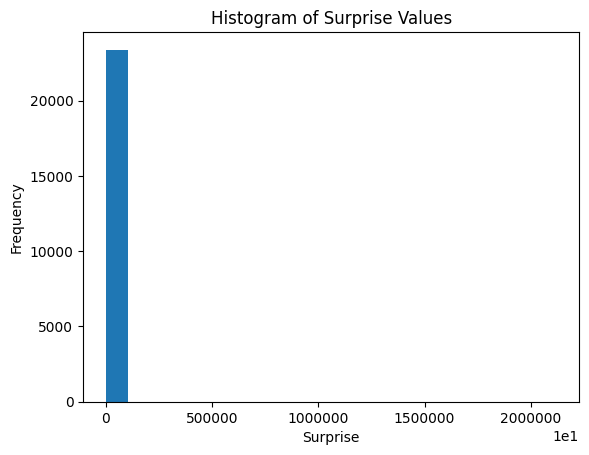

In [22]:
# Let's actually plot a histogram of those values to identify if the values above are outliers

plt.hist(df_surprise['Surprise'], bins=20)
plt.xlabel('Surprise')
plt.ylabel('Frequency')
plt.title('Histogram of Surprise Values')
plt.ticklabel_format(axis='x', style='sci', scilimits=(1,1))
plt.show()

# by using ticklabel_format and scilimits here we can see (although not obvious from the graph) that there are outliers as the scale of the x-axis hasn't automatically adjusted to be being around -10 to 10

In [23]:
# Wincorsizing to get results between 0.5% and 99.5% percentile for Surprise values

lower_bound = df_surprise['Surprise'].quantile(0.005)
upper_bound = df_surprise['Surprise'].quantile(0.995)

df_surprise = df_surprise[(df_surprise['Surprise'] >= lower_bound) & (df_surprise['Surprise'] <= upper_bound)]


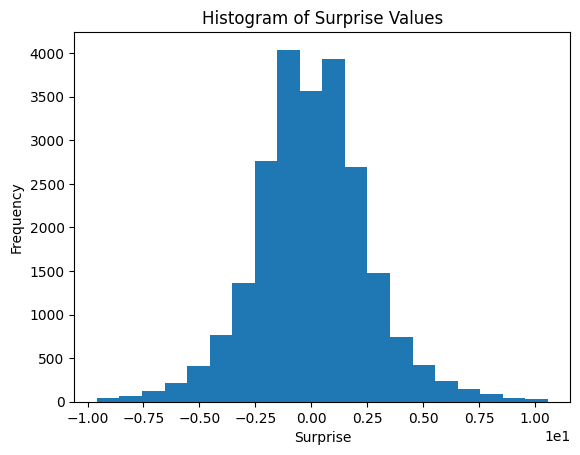

In [24]:
plt.hist(df_surprise['Surprise'], bins=20)
plt.xlabel('Surprise')
plt.ylabel('Frequency')
plt.title('Histogram of Surprise Values')
plt.ticklabel_format(axis='x', style='sci', scilimits=(1,1))
plt.show()

# Now the scale has automatically adjusted to being between -10 and 10 so outliers are removed, also we notice that surprises are quite normally distributed

In [25]:
# Let's now print the 10 rows with the largest Surprise values to see if anything looks abnormal - and it doesn't, as expected max values are around 10

df_surprise.nlargest(10, 'Surprise')

,Unnamed: 0,Period,Event,Ticker,Actual,Prior,Revised,Freq.,First Rev.,Last Rev.,...,Category,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag
2456,2001-04-18,Feb,Trade Balance,USTBTOT Index,-$27.0b,-$33.3b,<NA>,M,<NA>,-$35.2b,...,Economic Releases,NaN,82.9630,Wed,-$33.0b,40.0,0.57,10.58,United States,United States
32474,2023-01-13,Jan P,U. of Mich. Current Conditions,CONSCURR Index,68.6,59.4,<NA>,M,<NA>,<NA>,...,Economic Releases,NaN,21.4815,Fri,60,5.0,0.82,10.54,United States,United States
14287,2012-05-31,May,ISM Milwaukee,MAPMINDX Index,57.7,52.9,<NA>,M,<NA>,<NA>,...,Economic Releases,NaN,0.0000,Thu,53.4,3.0,0.41,10.46,United States,United States
26021,2019-05-17,May P,U. of Mich. Expectations,CONSEXP Index,96,87.4,<NA>,M,<NA>,<NA>,...,Economic Releases,NaN,23.7037,Fri,86.8,3.0,0.88,10.45,United States,United States
4815,2004-06-25,1Q F,GDP Price Deflator,GDP DCHG Index,0.029,0.026,<NA>,Q,<NA>,<NA>,...,Economic Releases,NaN,0.0000,Fri,0.026,47.0,0.03,10.39,United States,United States
22353,2017-05-11,Apr,"PPI Ex Food, Energy, Trade MoM",FDIDSGUM Index,0.007,0.001,<NA>,M,<NA>,0.001,...,Economic Releases,NaN,22.9630,Thu,0.002,8.0,0.05,10.33,United States,United States
12370,2011-01-05,Dec,ADP Employment Change,ADP CHNG Index,297k,93k,92k,M,92k,240k,...,Economic Releases,NaN,90.3704,Wed,100k,33.0,19.15,10.29,United States,United States
34665,2024-03-28,Mar F,U. of Mich. Current Conditions,CONSCURR Index,82.5,79.4,<NA>,M,<NA>,<NA>,...,Economic Releases,NaN,21.4815,Thu,79.6,3.0,0.28,10.25,United States,United States
7542,2007-02-15,2024-02-10 00:00:00,Initial Jobless Claims,INJCJC Index,357k,311k,313k,W,313k,310k,...,Economic Releases,NaN,98.5185,Thu,314k,39.0,4.2,10.23,United States,United States
34457,2024-02-16,Jan,"PPI Ex Food, Energy, Trade MoM",FDIDSGUM Index,0.006,0.002,0.003,M,0.003,0.003,...,Economic Releases,NaN,22.9630,Fri,0.001,9.0,0.05,10.06,United States,United States


In [26]:
df_surprise.columns

Index(['Unnamed: 0', 'Period', 'Event', 'Ticker', 'Actual', 'Prior', 'Revised',
       'Freq.', 'First Rev.', 'Last Rev.', 'Date', 'Time', 'C', 'Category',
       'Subcategory', 'R', 'Day', 'Surv(M)', '# Ests.', 'Std Dev', 'Surprise',
       'Country/Region', 'Flag'],
      dtype='object')

In [27]:
df_surprise[['Date','Time']]

,Date,Time
153,1997-06-25 00:00:00,07:30:00
198,1997-08-01 00:00:00,07:30:00
394,1997-12-23 00:00:00,07:30:00
523,1998-03-26 00:00:00,07:30:00
569,1998-04-30 00:00:00,07:30:00
...,...,...
35992,2024-12-18 00:00:00,07:30:00
35993,2024-12-18 00:00:00,07:30:00
35994,2024-12-18 00:00:00,07:30:00
35999,2024-12-18 00:00:00,13:00:00


In [28]:
# Step 1: Ensure columns are strings
df_surprise['Date'] = df_surprise['Date'].astype(str)
df_surprise['Time'] = df_surprise['Time'].astype(str)

# Step 2: Handle missing times (if any)
df_surprise['Time'] = df_surprise['Time'].fillna('00:00:00')

# Step 3: Combine Date and Time into DateTime
df_surprise['DateTime'] = pd.to_datetime(
    df_surprise['Date'].str[:10] + ' ' + df_surprise['Time'],
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'  # Converts invalid parsing to NaT instead of raising error
)

# Step 4: Verify the new column
print("\nFirst 5 rows of DateTime column:")
print(df_surprise['DateTime'].head())

# Step 5: Check for any parsing errors (NaT values)
print("\nNumber of invalid DateTime entries:")
print(df_surprise['DateTime'].isna().sum())


First 5 rows of DateTime column:
153   1997-06-25 07:30:00
198   1997-08-01 07:30:00
394   1997-12-23 07:30:00
523   1998-03-26 07:30:00
569   1998-04-30 07:30:00
Name: DateTime, dtype: datetime64[ns]

Number of invalid DateTime entries:
464


C:\Users\Jop Brouwer\AppData\Local\Temp\ipykernel_2444\1303372904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surprise['Date'] = df_surprise['Date'].astype(str)
C:\Users\Jop Brouwer\AppData\Local\Temp\ipykernel_2444\1303372904.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surprise['Time'] = df_surprise['Time'].astype(str)
C:\Users\Jop Brouwer\AppData\Local\Temp\ipykernel_2444\1303372904.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [29]:
# Strangely we get NaN values for DateTime so we next look into why that is
df_surprise.isna().sum()

Unnamed: 0            0
Period                0
Event                 0
Ticker                0
Actual                0
Prior                19
Revised            8690
Freq.                 0
First Rev.         8690
Last Rev.          4186
Date                  0
Time                  0
C                     0
Category              0
Subcategory       23169
R                     0
Day                   0
Surv(M)               0
# Ests.               0
Std Dev               0
Surprise              0
Country/Region        0
Flag                  0
DateTime            464
dtype: int64

In [30]:
# To do so we print the rows for which DateTime was NaN and we see the Date variable is weirdly formatted
nan_rows = df_surprise[df_surprise['DateTime'].isna()]
nan_rows[['Date','Time']]

,Date,Time
1583,01/03/000,09:00:00
1585,01/04/000,09:00:00
1587,01/05/000,09:00:00
1588,01/05/000,09:00:00
1590,01/06/000,07:30:00
...,...,...
2245,12/22/000,09:00:00
2248,12/28/000,07:30:00
2249,12/28/000,09:00:00
2250,12/28/000,09:00:00


In [31]:
# The first column is also a Date column and looks more appropriate from the output below so let's use that instead to create our DateTime variable
nan_rows[['Date','Unnamed: 0']]

,Date,Unnamed: 0
1583,01/03/000,2000-01-03
1585,01/04/000,2000-01-04
1587,01/05/000,2000-01-05
1588,01/05/000,2000-01-05
1590,01/06/000,2000-01-06
...,...,...
2245,12/22/000,2000-12-22
2248,12/28/000,2000-12-28
2249,12/28/000,2000-12-28
2250,12/28/000,2000-12-28


In [32]:
# First we drop Date and DateTime and change the column name for Unnamed: 0 to Date

df_surprise.drop(columns=['Date', 'DateTime'], inplace=True)
df_surprise.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df_surprise.columns

C:\Users\Jop Brouwer\AppData\Local\Temp\ipykernel_2444\1316665770.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surprise.drop(columns=['Date', 'DateTime'], inplace=True)
C:\Users\Jop Brouwer\AppData\Local\Temp\ipykernel_2444\1316665770.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surprise.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)


Index(['Date', 'Period', 'Event', 'Ticker', 'Actual', 'Prior', 'Revised',
       'Freq.', 'First Rev.', 'Last Rev.', 'Time', 'C', 'Category',
       'Subcategory', 'R', 'Day', 'Surv(M)', '# Ests.', 'Std Dev', 'Surprise',
       'Country/Region', 'Flag'],
      dtype='object')

In [33]:
# Now let's again create a DateTime column with the new Date column and check for number of NaN values
# Step 1: Ensure columns are strings
df_surprise['Date'] = df_surprise['Date'].astype(str)
df_surprise['Time'] = df_surprise['Time'].astype(str)

# Step 2: Handle missing times (if any)
df_surprise['Time'] = df_surprise['Time'].fillna('00:00:00')

# Step 3: Combine Date and Time into DateTime
df_surprise['DateTime'] = pd.to_datetime(
    df_surprise['Date'].str[:10] + ' ' + df_surprise['Time'],
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'  # Converts invalid parsing to NaT instead of raising error
)

df_surprise.isna().sum()

# Our new variable has no NaN values and is thus appropriate for the next part of our analysis

C:\Users\Jop Brouwer\AppData\Local\Temp\ipykernel_2444\2809420286.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surprise['Date'] = df_surprise['Date'].astype(str)
C:\Users\Jop Brouwer\AppData\Local\Temp\ipykernel_2444\2809420286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_surprise['Time'] = df_surprise['Time'].astype(str)
C:\Users\Jop Brouwer\AppData\Local\Temp\ipykernel_2444\2809420286.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

Date                  0
Period                0
Event                 0
Ticker                0
Actual                0
Prior                19
Revised            8690
Freq.                 0
First Rev.         8690
Last Rev.          4186
Time                  0
C                     0
Category              0
Subcategory       23169
R                     0
Day                   0
Surv(M)               0
# Ests.               0
Std Dev               0
Surprise              0
Country/Region        0
Flag                  0
DateTime              0
dtype: int64

In [34]:
df_surprise

,Date,Period,Event,Ticker,Actual,Prior,Revised,Freq.,First Rev.,Last Rev.,...,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag,DateTime
153,1997-06-25,1Q F,GDP Annualized QoQ,GDP CQOQ Index,0.059,0.058,<NA>,Q,<NA>,<NA>,...,NaN,96.296300,Wed,0.058,13.0,0.22,0.45,United States,United States,1997-06-25 07:30:00
198,1997-08-01,Jul,Change in Nonfarm Payrolls,NFP TCH Index,316k,217k,228k,M,228k,265k,...,NaN,99.259300,Fri,70k,20.0,33.84,7.27,United States,United States,1997-08-01 07:30:00
394,1997-12-23,3Q F,GDP Annualized QoQ,GDP CQOQ Index,0.031,0.033,<NA>,Q,<NA>,0.051,...,NaN,96.296300,Tue,0.033,11.0,0.07,-2.98,United States,United States,1997-12-23 07:30:00
523,1998-03-26,4Q F,GDP Annualized QoQ,GDP CQOQ Index,0.037,0.039,<NA>,Q,<NA>,<NA>,...,NaN,96.296300,Thu,0.039,22.0,0.08,-2.52,United States,United States,1998-03-26 07:30:00
569,1998-04-30,1Q A,GDP Annualized QoQ,GDP CQOQ Index,0.042,0.037,<NA>,Q,<NA>,<NA>,...,NaN,96.296300,Thu,0.034,19.0,0.36,2.22,United States,United States,1998-04-30 07:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35992,2024-12-18,Nov P,Building Permits,NHSPATOT Index,1505k,1416k,1419k,M,1419k,1419k,...,NaN,61.185200,Wed,1430k,46.0,22.21,3.38,United States,United States,2024-12-18 07:30:00
35993,2024-12-18,Nov P,Building Permits MoM,NHCHATCH Index,0.061,-0.006,-0.004,M,-0.004,-0.004,...,NaN,31.851900,Wed,0.01,46.0,1.78,2.87,United States,United States,2024-12-18 07:30:00
35994,2024-12-18,3Q,Current Account Balance,USCABAL Index,-$310.9b,-$266.8b,-$275.0b,Q,-$275.0b,-$275.0b,...,NaN,71.111100,Wed,-$287.1b,18.0,6.22,-3.84,United States,United States,2024-12-18 07:30:00
35999,2024-12-18,2024-12-18 00:00:00,FOMC Median Rate Forecast: Next Yr,DOTDY1MD Index,0.03875,0.03375,<NA>,D,<NA>,<NA>,...,NaN,2.222220,Wed,0.03625,12.0,0.12,2.03,United States,United States,2024-12-18 13:00:00


In [58]:
# Now let's do the same for df_es

df_es

,Date,Time,Open,High,Low,Close,Volume,Tick Count
0,09/10/1997,00:01,0.00,0.00,0.00,0.00,0,0
1,09/10/1997,00:02,0.00,0.00,0.00,0.00,0,0
2,09/10/1997,00:03,0.00,0.00,0.00,0.00,0,0
3,09/10/1997,00:04,0.00,0.00,0.00,0.00,0,0
4,09/10/1997,00:05,0.00,0.00,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...
9682630,12/19/2024,15:56,5941.75,5942.00,5941.25,5941.75,318,79
9682631,12/19/2024,15:57,5941.75,5942.00,5941.25,5941.50,386,100
9682632,12/19/2024,15:58,5941.50,5941.50,5940.75,5941.00,484,122
9682633,12/19/2024,15:59,5940.75,5941.25,5940.75,5941.00,6462,138


In [59]:
df_es.isna().sum()

Date          0
Time          0
Open          0
High          0
Low           0
Close         0
Volume        0
Tick Count    0
dtype: int64

In [46]:
# Pre-step: Remove column 'DateTime' if exists
if 'DateTime' in df_es.columns:
    df_es.drop(columns=['DateTime'], inplace=True)

In [60]:
# Step 1: Ensure columns are strings
df_es['Date'] = df_es['Date'].astype(str)
df_es['Time'] = df_es['Time'].astype(str)

# Step 2: Handle missing times (if any) and pad with seconds
df_es['Time'] = df_es['Time'].fillna('00:00')  # Fill missing times
df_es['Time'] = df_es['Time'] + ':00'  # Add seconds to make HH:MM:SS format

# Step 3: Combine Date and Time into DateTime with correct format
df_es['DateTime'] = pd.to_datetime(
    df_es['Date'] + ' ' + df_es['Time'],
    format='%m/%d/%Y %H:%M:%S',  # Matches MM/DD/YYYY date and HH:MM:SS time
    errors='coerce'
)

# Count NaN values in each column
print(df_es.isna().sum())

Date          0
Time          0
Open          0
High          0
Low           0
Close         0
Volume        0
Tick Count    0
DateTime      0
dtype: int64


In [61]:
df_es

,Date,Time,Open,High,Low,Close,Volume,Tick Count,DateTime
0,09/10/1997,00:01:00,0.00,0.00,0.00,0.00,0,0,1997-09-10 00:01:00
1,09/10/1997,00:02:00,0.00,0.00,0.00,0.00,0,0,1997-09-10 00:02:00
2,09/10/1997,00:03:00,0.00,0.00,0.00,0.00,0,0,1997-09-10 00:03:00
3,09/10/1997,00:04:00,0.00,0.00,0.00,0.00,0,0,1997-09-10 00:04:00
4,09/10/1997,00:05:00,0.00,0.00,0.00,0.00,0,0,1997-09-10 00:05:00
...,...,...,...,...,...,...,...,...,...
9682630,12/19/2024,15:56:00,5941.75,5942.00,5941.25,5941.75,318,79,2024-12-19 15:56:00
9682631,12/19/2024,15:57:00,5941.75,5942.00,5941.25,5941.50,386,100,2024-12-19 15:57:00
9682632,12/19/2024,15:58:00,5941.50,5941.50,5940.75,5941.00,484,122,2024-12-19 15:58:00
9682633,12/19/2024,15:59:00,5940.75,5941.25,5940.75,5941.00,6462,138,2024-12-19 15:59:00


In [62]:
# Now we create the merged dataframe for our analysis - to allow us to match times of surprise with the price of the future at the time
df_combined = pd.merge(
    df_es,
    df_surprise,
    on='DateTime',
    how='outer',
    suffixes=('_es', '_surprise'),
    indicator=True  # this shows the source of each using suffix
)

df_combined

,Date_es,Time_es,Open,High,Low,Close,Volume,Tick Count,DateTime,Date_surprise,...,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag,_merge
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-06-25 07:30:00,1997-06-25,...,NaN,96.2963,Wed,0.058,13.0,0.22,0.45,United States,United States,right_only
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997-08-01 07:30:00,1997-08-01,...,NaN,99.2593,Fri,70k,20.0,33.84,7.27,United States,United States,right_only
2,09/10/1997,00:01:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,09/10/1997,00:02:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:02:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,09/10/1997,00:03:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:03:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695761,12/19/2024,15:56:00,5941.75,5942.00,5941.25,5941.75,318.0,79.0,2024-12-19 15:56:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9695762,12/19/2024,15:57:00,5941.75,5942.00,5941.25,5941.50,386.0,100.0,2024-12-19 15:57:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9695763,12/19/2024,15:58:00,5941.50,5941.50,5940.75,5941.00,484.0,122.0,2024-12-19 15:58:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9695764,12/19/2024,15:59:00,5940.75,5941.25,5940.75,5941.00,6462.0,138.0,2024-12-19 15:59:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [63]:
df_combined.isna().sum()

Date_es               101
Time_es               101
Open                  101
High                  101
Low                   101
Close                 101
Volume                101
Tick Count            101
DateTime                0
Date_surprise     9672597
Period            9672597
Event             9672597
Ticker            9672597
Actual            9672597
Prior             9672616
Revised           9681287
Freq.             9672597
First Rev.        9681287
Last Rev.         9676783
Time_surprise     9672597
C                 9672597
Category          9672597
Subcategory       9695766
R                 9672597
Day               9672597
Surv(M)           9672597
# Ests.           9672597
Std Dev           9672597
Surprise          9672597
Country/Region    9672597
Flag              9672597
_merge                  0
dtype: int64

In [64]:
# Some surprise announcements might have come before the starting point for the data on the futures, these would be meaningless for our analysis and should thus
# be removed by removing all rows with NaN values for Open

df_combined.dropna(subset=['Open'], inplace=True)

df_combined.isna().sum()

Date_es                 0
Time_es                 0
Open                    0
High                    0
Low                     0
Close                   0
Volume                  0
Tick Count              0
DateTime                0
Date_surprise     9672597
Period            9672597
Event             9672597
Ticker            9672597
Actual            9672597
Prior             9672616
Revised           9681231
Freq.             9672597
First Rev.        9681231
Last Rev.         9676757
Time_surprise     9672597
C                 9672597
Category          9672597
Subcategory       9695665
R                 9672597
Day               9672597
Surv(M)           9672597
# Ests.           9672597
Std Dev           9672597
Surprise          9672597
Country/Region    9672597
Flag              9672597
_merge                  0
dtype: int64

In [65]:
# Upon analysing our combined dataframe again we now see that it all looks good

df_combined

,Date_es,Time_es,Open,High,Low,Close,Volume,Tick Count,DateTime,Date_surprise,...,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag,_merge
2,09/10/1997,00:01:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,09/10/1997,00:02:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:02:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,09/10/1997,00:03:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:03:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
5,09/10/1997,00:04:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:04:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
6,09/10/1997,00:05:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:05:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695761,12/19/2024,15:56:00,5941.75,5942.00,5941.25,5941.75,318.0,79.0,2024-12-19 15:56:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9695762,12/19/2024,15:57:00,5941.75,5942.00,5941.25,5941.50,386.0,100.0,2024-12-19 15:57:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9695763,12/19/2024,15:58:00,5941.50,5941.50,5940.75,5941.00,484.0,122.0,2024-12-19 15:58:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
9695764,12/19/2024,15:59:00,5940.75,5941.25,5940.75,5941.00,6462.0,138.0,2024-12-19 15:59:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


# **Creating a naive benchmark strategy that trades whenever a surprise occurs - comparing this with our more sophisticated strategies should show the importance of only trading on surprises in significant determinants of asset returns**

In [66]:
# First we create an indicator variable with a value True if the column for Surprise is non-missing for that row

df_combined['Surprise Occurred'] = df_combined['Surprise'].notna()

df_combined

,Date_es,Time_es,Open,High,Low,Close,Volume,Tick Count,DateTime,Date_surprise,...,R,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag,_merge,Surprise Occurred
2,09/10/1997,00:01:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
3,09/10/1997,00:02:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:02:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
4,09/10/1997,00:03:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:03:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
5,09/10/1997,00:04:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:04:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
6,09/10/1997,00:05:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:05:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695761,12/19/2024,15:56:00,5941.75,5942.00,5941.25,5941.75,318.0,79.0,2024-12-19 15:56:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
9695762,12/19/2024,15:57:00,5941.75,5942.00,5941.25,5941.50,386.0,100.0,2024-12-19 15:57:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
9695763,12/19/2024,15:58:00,5941.50,5941.50,5940.75,5941.00,484.0,122.0,2024-12-19 15:58:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False
9695764,12/19/2024,15:59:00,5940.75,5941.25,5940.75,5941.00,6462.0,138.0,2024-12-19 15:59:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False


In [67]:
df_combined.isna().sum()

Date_es                    0
Time_es                    0
Open                       0
High                       0
Low                        0
Close                      0
Volume                     0
Tick Count                 0
DateTime                   0
Date_surprise        9672597
Period               9672597
Event                9672597
Ticker               9672597
Actual               9672597
Prior                9672616
Revised              9681231
Freq.                9672597
First Rev.           9681231
Last Rev.            9676757
Time_surprise        9672597
C                    9672597
Category             9672597
Subcategory          9695665
R                    9672597
Day                  9672597
Surv(M)              9672597
# Ests.              9672597
Std Dev              9672597
Surprise             9672597
Country/Region       9672597
Flag                 9672597
_merge                     0
Surprise Occurred          0
dtype: int64

In [70]:
# count the number of times the Surprise Occurred variable is True and False
df_combined['Surprise Occurred'].value_counts()

Surprise Occurred
False    9672597
True       23068
Name: count, dtype: int64

In [72]:
# Same number of False values for the new surprise variables as original surprise variable
# so the new variables were correctly created
df_combined[df_combined['Surprise Occurred'] == False].count()

Date_es              9672597
Time_es              9672597
Open                 9672597
High                 9672597
Low                  9672597
Close                9672597
Volume               9672597
Tick Count           9672597
DateTime             9672597
Date_surprise              0
Period                     0
Event                      0
Ticker                     0
Actual                     0
Prior                      0
Revised                    0
Freq.                      0
First Rev.                 0
Last Rev.                  0
Time_surprise              0
C                          0
Category                   0
Subcategory                0
R                          0
Day                        0
Surv(M)                    0
# Ests.                    0
Std Dev                    0
Surprise                   0
Country/Region             0
Flag                       0
_merge               9672597
Surprise Occurred    9672597
dtype: int64

In [76]:
# Lets now create a new indicator called First Post Surprise which takes a value or true for being the first minute level observation after a surprise occurs
# i.e. right after the Surprise Occurred variable take a value of True this should take a value of True



df_combined['First Post Surprise'] = df_combined['Surprise Occurred'].shift(1)
df_combined['First Post Surprise'].iloc[0] = False

df_combined

C:\Users\Jop Brouwer\AppData\Local\Temp\ipykernel_2444\1750306210.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_combined['First Post Surprise'].iloc[0] = False
C:\Users\Jop Brouwer\AppData\Local\Temp\ipykernel_2444\1750306210.py:7: 

,Date_es,Time_es,Open,High,Low,Close,Volume,Tick Count,DateTime,Date_surprise,...,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag,_merge,Surprise Occurred,First Post Surprise
2,09/10/1997,00:01:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
3,09/10/1997,00:02:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:02:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
4,09/10/1997,00:03:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:03:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
5,09/10/1997,00:04:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:04:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
6,09/10/1997,00:05:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:05:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695761,12/19/2024,15:56:00,5941.75,5942.00,5941.25,5941.75,318.0,79.0,2024-12-19 15:56:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
9695762,12/19/2024,15:57:00,5941.75,5942.00,5941.25,5941.50,386.0,100.0,2024-12-19 15:57:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
9695763,12/19/2024,15:58:00,5941.50,5941.50,5940.75,5941.00,484.0,122.0,2024-12-19 15:58:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False
9695764,12/19/2024,15:59:00,5940.75,5941.25,5940.75,5941.00,6462.0,138.0,2024-12-19 15:59:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,False


In [77]:
# print df combined where columsn surprise occurred and first post surprise are true, 1 of them true is enough to show row
df_combined[(df_combined['Surprise Occurred'] == True) | (df_combined['First Post Surprise'] == True)]

,Date_es,Time_es,Open,High,Low,Close,Volume,Tick Count,DateTime,Date_surprise,...,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag,_merge,Surprise Occurred,First Post Surprise
102676,12/23/1997,07:30:00,1189.71,1189.71,1189.71,1189.71,0.0,0.0,1997-12-23 07:30:00,1997-12-23,...,Tue,0.033,11.0,0.07,-2.98,United States,United States,both,True,False
102677,12/23/1997,07:31:00,1189.40,1189.40,1189.09,1189.09,0.0,2.0,1997-12-23 07:31:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
191131,03/26/1998,07:30:00,1355.65,1355.96,1355.65,1355.96,0.0,6.0,1998-03-26 07:30:00,1998-03-26,...,Thu,0.039,22.0,0.08,-2.52,United States,United States,both,True,False
191132,03/26/1998,07:31:00,1355.96,1355.96,1355.04,1355.04,0.0,4.0,1998-03-26 07:31:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
224731,04/30/1998,07:30:00,1338.85,1338.85,1338.85,1338.85,0.0,0.0,1998-04-30 07:30:00,1998-04-30,...,Thu,0.034,19.0,0.36,2.22,United States,United States,both,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693874,12/18/2024,07:30:00,6145.50,6146.00,6145.50,6145.75,131.0,64.0,2024-12-18 07:30:00,2024-12-18,...,Wed,-$287.1b,18.0,6.22,-3.84,United States,United States,both,True,True
9693875,12/18/2024,07:31:00,6145.50,6146.00,6144.50,6145.25,305.0,140.0,2024-12-18 07:31:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
9694204,12/18/2024,13:00:00,6135.75,6136.75,6135.50,6136.00,801.0,341.0,2024-12-18 13:00:00,2024-12-18,...,Wed,0.03625,12.0,0.12,2.03,United States,United States,both,True,False
9694205,12/18/2024,13:00:00,6135.75,6136.75,6135.50,6136.00,801.0,341.0,2024-12-18 13:00:00,2024-12-18,...,Wed,0.03125,11.0,0.11,2.35,United States,United States,both,True,True


**Defining key hyperparameter of holding period (based on literature but also varied up and down slightly)**

In [78]:
holding_period = 20

In [79]:
df_combined[df_combined['First Post Surprise'] == True]


,Date_es,Time_es,Open,High,Low,Close,Volume,Tick Count,DateTime,Date_surprise,...,Day,Surv(M),# Ests.,Std Dev,Surprise,Country/Region,Flag,_merge,Surprise Occurred,First Post Surprise
102677,12/23/1997,07:31:00,1189.40,1189.40,1189.09,1189.09,0.0,2.0,1997-12-23 07:31:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
191132,03/26/1998,07:31:00,1355.96,1355.96,1355.04,1355.04,0.0,4.0,1998-03-26 07:31:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
224732,04/30/1998,07:31:00,1339.15,1345.57,1339.15,1345.26,0.0,30.0,1998-04-30 07:31:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
254267,06/01/1998,09:01:00,1334.87,1336.10,1334.57,1335.18,0.0,24.0,1998-06-01 09:01:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
255692,06/02/1998,09:00:00,1343.12,1343.12,1342.21,1342.51,0.0,22.0,1998-06-02 09:00:00,1998-06-02,...,Tue,-0.002,6.0,0.21,1.41,United States,United States,both,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9693873,12/18/2024,07:30:00,6145.50,6146.00,6145.50,6145.75,131.0,64.0,2024-12-18 07:30:00,2024-12-18,...,Wed,0.01,46.0,1.78,2.87,United States,United States,both,True,True
9693874,12/18/2024,07:30:00,6145.50,6146.00,6145.50,6145.75,131.0,64.0,2024-12-18 07:30:00,2024-12-18,...,Wed,-$287.1b,18.0,6.22,-3.84,United States,United States,both,True,True
9693875,12/18/2024,07:31:00,6145.50,6146.00,6144.50,6145.25,305.0,140.0,2024-12-18 07:31:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only,False,True
9694205,12/18/2024,13:00:00,6135.75,6136.75,6135.50,6136.00,801.0,341.0,2024-12-18 13:00:00,2024-12-18,...,Wed,0.03125,11.0,0.11,2.35,United States,United States,both,True,True


In [80]:
# As can be seen there as instances where we have multiple returns on the same day but this
# is not an issue - we take positions independent of other surprises in all 3 models i.e.
# a position that is held due to one suprise is not impacted by a different variable's surprise

df_combined.iloc[255689:255691, 8:29]

,DateTime,Date_surprise,Period,Event,Ticker,Actual,Prior,Revised,Freq.,First Rev.,...,Time_surprise,C,Category,Subcategory,R,Day,Surv(M),# Ests.,Std Dev,Surprise
255691,1998-06-02 09:00:00,1998-06-02,Apr,New Home Sales,NHSLTOT Index,888k,828k,844k,M,844k,...,09:00:00,US,Economic Releases,NaN,88.1481,Tue,840k,14.0,13.02,3.69
255692,1998-06-02 09:00:00,1998-06-02,Apr,Leading Index,LEI CHNG Index,0.001,0.002,<NA>,M,<NA>,...,09:00:00,US,Economic Releases,NaN,82.2222,Tue,-0.002,6.0,0.21,1.41


In [81]:
"""
 Now we create general returns for our 3 variants of holding periods (to be optimized on
 validation set for statistical and ML models) and returns for our naive model which goes
 long when there's a positive surprise and short when there's a negative surprise (the returns
 with a prefix of N_)
"""

df_combined['N_Return'] = np.nan
df_combined['N_Return_half'] = np.nan
df_combined['N_Return_double'] = np.nan
df_combined['Return'] = np.nan
df_combined['Return_half'] = np.nan
df_combined['Return_double'] = np.nan

surprise_rows = df_combined[df_combined['First Post Surprise'] == True]

for index, row in surprise_rows.iterrows():
    row_position = df_combined.index.get_loc(index)

    # Get the Surprise value from the previous row
    if index > df_combined.index[0]:
        prev_surprise = df_combined.at[df_combined.index[df_combined.index.get_loc(index)-1], 'Surprise']
    else:
        prev_surprise = 0  # Default if no previous row exists

    if row_position + holding_period < len(df_combined):
        current_price = row['Open']
        future_row = df_combined.iloc[row_position + holding_period]
        future_price = future_row['Open']

        if current_price != 0:
            percentage_increase = (future_price - current_price) / current_price
        else:
            percentage_increase = np.nan

        df_combined.at[index, 'Return'] = percentage_increase
        if prev_surprise < 0:
            df_combined.at[index, 'N_Return'] = -percentage_increase
        else:
            df_combined.at[index, 'N_Return'] = percentage_increase

    if row_position + int(holding_period*0.5) < len(df_combined): # int converts to whole number to avoid that potential error
        current_price = row['Open']
        future_row = df_combined.iloc[row_position + int(holding_period*0.5)]
        future_price = future_row['Open']

        if current_price != 0:
            percentage_increase = (future_price - current_price) / current_price
        else:
            percentage_increase = np.nan

        df_combined.at[index, 'Return_half'] = percentage_increase
        if prev_surprise < 0:
            df_combined.at[index, 'N_Return_half'] = -percentage_increase
        else:
            df_combined.at[index, 'N_Return_half'] = percentage_increase

    if row_position + int(holding_period*2) < len(df_combined):
        current_price = row['Open']
        future_row = df_combined.iloc[row_position + int(holding_period*2)]
        future_price = future_row['Open']

        if current_price != 0:
            percentage_increase = (future_price - current_price) / current_price
        else:
            percentage_increase = np.nan

        df_combined.at[index, 'Return_double'] = percentage_increase
        if prev_surprise < 0:
            df_combined.at[index, 'N_Return_double'] = -percentage_increase
        else:
            df_combined.at[index, 'N_Return_double'] = percentage_increase

df_combined

,Date_es,Time_es,Open,High,Low,Close,Volume,Tick Count,DateTime,Date_surprise,...,Flag,_merge,Surprise Occurred,First Post Surprise,N_Return,N_Return_half,N_Return_double,Return,Return_half,Return_double
2,09/10/1997,00:01:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:01:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
3,09/10/1997,00:02:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:02:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
4,09/10/1997,00:03:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:03:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
5,09/10/1997,00:04:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:04:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
6,09/10/1997,00:05:00,0.00,0.00,0.00,0.00,0.0,0.0,1997-09-10 00:05:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695761,12/19/2024,15:56:00,5941.75,5942.00,5941.25,5941.75,318.0,79.0,2024-12-19 15:56:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
9695762,12/19/2024,15:57:00,5941.75,5942.00,5941.25,5941.50,386.0,100.0,2024-12-19 15:57:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
9695763,12/19/2024,15:58:00,5941.50,5941.50,5940.75,5941.00,484.0,122.0,2024-12-19 15:58:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN
9695764,12/19/2024,15:59:00,5940.75,5941.25,5940.75,5941.00,6462.0,138.0,2024-12-19 15:59:00,NaN,...,NaN,left_only,False,False,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
zero_count = (df_combined['Surprise'] == 0).sum()

print(zero_count)

0


In [83]:
# The number of NaN values for this new column make sense - same as the number of NaNs for the Surprise column
df_combined.isna().sum()

Date_es                      0
Time_es                      0
Open                         0
High                         0
Low                          0
Close                        0
Volume                       0
Tick Count                   0
DateTime                     0
Date_surprise          9672597
Period                 9672597
Event                  9672597
Ticker                 9672597
Actual                 9672597
Prior                  9672616
Revised                9681231
Freq.                  9672597
First Rev.             9681231
Last Rev.              9676757
Time_surprise          9672597
C                      9672597
Category               9672597
Subcategory            9695665
R                      9672597
Day                    9672597
Surv(M)                9672597
# Ests.                9672597
Std Dev                9672597
Surprise               9672597
Country/Region         9672597
Flag                   9672597
_merge                       0
Surprise

**Now we get Returns & Standard Deviation**

In [87]:
# Just checking how long futures market is typically open for (some surprises on same day might bias this value a bit but not by muchh)
date_counts = df_combined['DateTime'].dt.floor('D').value_counts()

# Calculate statistics
avg_minutes_per_day = date_counts.mean()
avg_holding_period_intervals = avg_minutes_per_day / holding_period

print(f"Average market open minutes per day: {avg_minutes_per_day:.1f}")
print(f"Average holding-period intervals per day: {holding_period:.1f}")

Average market open minutes per day: 1147.8
Average holding-period intervals per day: 20.0


In [85]:
average_return = df_combined['Return'].dropna().mean()
print(average_return)

3.253384860842976e-06


In [88]:
train_end = int(0.3 * len(df_combined))
validation_end = int(0.5 * len(df_combined))
print(train_end)
print(validation_end)

2908699
4847832


In [92]:
"""Computing average annual returns for all of the years in the dataframe using the naive strategy as follows:
   Validation set used to determine which of the 3 holding periods performed best and then the following year is used as the test set with that specific holding period and then
   this process is repeated
"""

# Group by year and compute compounded returns
annual_returns = {}
for year, group in df_combined[df_combined['Return'].notna()].groupby(df_combined['DateTime'].dt.year):
    compounded_return = (1 + group['Return']).prod() - 1
    annual_returns[year] = compounded_return

# Convert to percentage and display
annual_returns_pct = {year: f"{ret*100:.2f}%" for year, ret in annual_returns.items()}
print("Annual Compounded Returns:")
print(annual_returns_pct)


Annual Compounded Returns:
{1997: '0.03%', 1998: '-3.79%', 1999: '23.17%', 2000: '12.73%', 2001: '-23.17%', 2002: '-11.97%', 2003: '-3.47%', 2004: '-6.25%', 2005: '12.02%', 2006: '4.17%', 2007: '23.11%', 2008: '12.10%', 2009: '-15.67%', 2010: '-4.45%', 2011: '-3.59%', 2012: '-18.80%', 2013: '6.40%', 2014: '2.24%', 2015: '-18.95%', 2016: '-5.29%', 2017: '9.22%', 2018: '-6.42%', 2019: '-2.83%', 2020: '75.86%', 2021: '28.83%', 2022: '-51.30%', 2023: '17.57%', 2024: '8.81%'}


In [93]:
# This strategy: 1) Uses validation period to pick best return horizon (half/normal/double),
# 2) Tests it on next 252 days, 3) Rolls forward annually, keeping window sizes constant


train_end = int(0.3 * len(df_combined))
validation_end = int(0.5 * len(df_combined))
test_days = 252
return_cols = ['N_Return_half', 'N_Return', 'N_Return_double']
df_combined.index = pd.to_datetime(df_combined.index)
results = []
optimal_horizons = []

while validation_end + test_days <= len(df_combined):
    validation_df = df_combined.iloc[train_end:validation_end]

    cum_returns = {}
    for col in return_cols:
        returns = validation_df[col].dropna()
        cum_returns[col] = (1 + returns).prod() - 1

    optimal_col = max(cum_returns, key=cum_returns.get)
    optimal_horizons.append(optimal_col)

    test_start = validation_end
    test_end = min(validation_end + test_days, len(df_combined))
    test_df = df_combined.iloc[test_start:test_end]

    optimal_returns = test_df[optimal_col].dropna()
    compounded_return = (1 + optimal_returns).prod() - 1

    results.append({
        'train_start': df_combined.index[0],
        'train_end': df_combined.index[train_end],
        'validation_start': df_combined.index[train_end],
        'validation_end': df_combined.index[validation_end],
        'test_start': df_combined.index[test_start],
        'test_end': df_combined.index[test_end - 1],
        'optimal_horizon': optimal_col,
        'compounded_return': compounded_return
    })

    train_end += 252
    validation_end += 252

results_df = pd.DataFrame(results)
print(results_df)
print("\nOptimal horizons selected:", pd.Series(optimal_horizons).value_counts())


                        train_start                     train_end  \
0     1970-01-01 00:00:00.000000002 1970-01-01 00:00:00.002908726   
1     1970-01-01 00:00:00.000000002 1970-01-01 00:00:00.002908978   
2     1970-01-01 00:00:00.000000002 1970-01-01 00:00:00.002909230   
3     1970-01-01 00:00:00.000000002 1970-01-01 00:00:00.002909482   
4     1970-01-01 00:00:00.000000002 1970-01-01 00:00:00.002909734   
...                             ...                           ...   
19232 1970-01-01 00:00:00.000000002 1970-01-01 00:00:00.007755243   
19233 1970-01-01 00:00:00.000000002 1970-01-01 00:00:00.007755495   
19234 1970-01-01 00:00:00.000000002 1970-01-01 00:00:00.007755747   
19235 1970-01-01 00:00:00.000000002 1970-01-01 00:00:00.007755999   
19236 1970-01-01 00:00:00.000000002 1970-01-01 00:00:00.007756251   

                   validation_start                validation_end  \
0     1970-01-01 00:00:00.002908726 1970-01-01 00:00:00.004847872   
1     1970-01-01 00:00:00.0029089

In [94]:
results_df

,train_start,train_end,validation_start,validation_end,test_start,test_end,optimal_horizon,compounded_return
0,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.002908726,1970-01-01 00:00:00.002908726,1970-01-01 00:00:00.004847872,1970-01-01 00:00:00.004847872,1970-01-01 00:00:00.004848123,N_Return_half,0.0
1,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.002908978,1970-01-01 00:00:00.002908978,1970-01-01 00:00:00.004848124,1970-01-01 00:00:00.004848124,1970-01-01 00:00:00.004848375,N_Return_half,0.0
2,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.002909230,1970-01-01 00:00:00.002909230,1970-01-01 00:00:00.004848376,1970-01-01 00:00:00.004848376,1970-01-01 00:00:00.004848627,N_Return_half,0.0
3,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.002909482,1970-01-01 00:00:00.002909482,1970-01-01 00:00:00.004848628,1970-01-01 00:00:00.004848628,1970-01-01 00:00:00.004848879,N_Return_half,0.0
4,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.002909734,1970-01-01 00:00:00.002909734,1970-01-01 00:00:00.004848880,1970-01-01 00:00:00.004848880,1970-01-01 00:00:00.004849131,N_Return_half,0.0
...,...,...,...,...,...,...,...,...
19232,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.007755243,1970-01-01 00:00:00.007755243,1970-01-01 00:00:00.009694397,1970-01-01 00:00:00.009694397,1970-01-01 00:00:00.009694648,N_Return_half,0.0
19233,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.007755495,1970-01-01 00:00:00.007755495,1970-01-01 00:00:00.009694649,1970-01-01 00:00:00.009694649,1970-01-01 00:00:00.009694900,N_Return_half,0.0
19234,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.007755747,1970-01-01 00:00:00.007755747,1970-01-01 00:00:00.009694901,1970-01-01 00:00:00.009694901,1970-01-01 00:00:00.009695152,N_Return_half,0.0
19235,1970-01-01 00:00:00.000000002,1970-01-01 00:00:00.007755999,1970-01-01 00:00:00.007755999,1970-01-01 00:00:00.009695153,1970-01-01 00:00:00.009695153,1970-01-01 00:00:00.009695404,N_Return_half,0.0


In [95]:
train_end = int(0.3 * len(df_combined))
validation_end = int(0.5 * len(df_combined))
return_cols = ['N_Return_half', 'N_Return', 'N_Return_double']
df_combined.index = pd.to_datetime(df_combined.index)
results = []
optimal_horizons = []
iteration = 0

current_date = df_combined.index[validation_end]

while current_date <= df_combined.index[-1]:
    iteration += 1

    validation_mask = (df_combined.index >= df_combined.index[train_end]) & (df_combined.index < current_date)
    validation_df = df_combined[validation_mask]

    cum_returns = {}
    for col in return_cols:
        returns = validation_df[col].dropna()
        cum_returns[col] = (1 + returns).prod() - 1

    optimal_col = max(cum_returns, key=cum_returns.get)
    optimal_horizons.append(optimal_col)

    next_year = current_date + pd.DateOffset(years=1)
    test_mask = (df_combined.index >= current_date) & (df_combined.index < next_year)
    test_df = df_combined[test_mask]

    optimal_returns = test_df[optimal_col].dropna()
    compounded_return = (1 + optimal_returns).prod() - 1

    results.append({
        'iteration': iteration,
        'train_start': df_combined.index[0],
        'train_end': df_combined.index[train_end],
        'validation_start': df_combined.index[train_end],
        'validation_end': current_date,
        'test_start': current_date,
        'test_end': min(next_year, df_combined.index[-1]),
        'optimal_horizon': optimal_col,
        'compounded_return': compounded_return * 100  # as percentage
    })

    current_date = next_year
    train_end = len(df_combined[df_combined.index < current_date])

results_df = pd.DataFrame(results)

# Calculate metrics
all_returns = results_df['compounded_return'] / 100  # Convert back to decimal
volatility = np.std(all_returns) * np.sqrt(252) * 100  # Annualized percentage
overall_return = ((1 + all_returns).prod() - 1) * 100  # Total compounded return percentage

print(results_df)
print("\nOptimal horizons selected:", pd.Series(optimal_horizons).value_counts())
print(f"\nAnnualized Volatility: {volatility:.2f}%")
print(f"Overall Compounded Return: {overall_return:.2f}%")

   iteration                   train_start                     train_end  \
0          1 1970-01-01 00:00:00.000000002 1970-01-01 00:00:00.002908726   

               validation_start                validation_end  \
0 1970-01-01 00:00:00.002908726 1970-01-01 00:00:00.004847872   

                     test_start                      test_end optimal_horizon  \
0 1970-01-01 00:00:00.004847872 1970-01-01 00:00:00.009695765   N_Return_half   

   compounded_return  
0         -34.337122  

Optimal horizons selected: N_Return_half    1
Name: count, dtype: int64

Annualized Volatility: 0.00%
Overall Compounded Return: -34.34%


In [96]:
df_combined.loc[df_combined['Return'].notna(), 'Return']

1970-01-01 00:00:00.000102677    0.000261
1970-01-01 00:00:00.000191132   -0.000229
1970-01-01 00:00:00.000224732    0.012553
1970-01-01 00:00:00.000254267    0.003439
1970-01-01 00:00:00.000255692    0.000000
                                   ...   
1970-01-01 00:00:00.009693873   -0.001464
1970-01-01 00:00:00.009693874   -0.001627
1970-01-01 00:00:00.009693875   -0.001505
1970-01-01 00:00:00.009694205   -0.008923
1970-01-01 00:00:00.009694206   -0.008515
Name: Return, Length: 23068, dtype: float64

In [109]:
# Looking at the geometric average of the entire series of returns not by year to see if grouping by year was done correctly
valid_returns = df_combined['Return'].dropna()
geometric_avg = (np.prod(1 + valid_returns) ** (1 / len(valid_returns))) - 1
print(geometric_avg)

avg_return = sum(annual_returns.values()) / len(annual_returns)
print(avg_return)

-1.21324095059272e-06
4.422338537404416e-06


In [110]:
annual_returns = df_combined.groupby(df_combined['DateTime'].dt.year)['Return'].mean().to_dict()
annual_returns

{1997: 0.0002606356145955485,
 1998: -0.00020956893538819717,
 1999: 0.0004988244574145141,
 2000: 0.0002684986460893807,
 2001: -0.0005444645664330749,
 2002: -0.00023953302427943407,
 2003: -5.533194836225224e-05,
 2004: -9.937709768718997e-05,
 2005: 0.00016534471275487115,
 2006: 5.8232589402879836e-05,
 2007: 0.0002746571988829703,
 2008: 0.00014852595474129738,
 2009: -0.00018221715084193647,
 2010: -4.344048817019308e-05,
 2011: -3.304701673406604e-05,
 2012: -0.00020994857907724417,
 2013: 6.255189303160092e-05,
 2014: 2.3087986043625278e-05,
 2015: -0.00019676055581657395,
 2016: -5.077011334314036e-05,
 2017: 8.835157803330207e-05,
 2018: -6.597518711908979e-05,
 2019: -2.5769074671865625e-05,
 2020: 0.0004969704147510501,
 2021: 0.00022514998176836494,
 2022: -0.0005787472358058938,
 2023: 0.0001427812597372052,
 2024: 7.529344895350401e-05}

In [111]:
# Compute geometric mean per year
annual_returns = (
    df_combined.groupby(df_combined['DateTime'].dt.year)['Return']
    .apply(lambda x: (np.prod(1 + x.dropna())) ** (1 / len(x.dropna())) - 1)
    .to_dict()
)

# Print results
print("Annual Geometric Mean Returns:")
for year, ret in annual_returns.items():
    print(f"{year}: {ret:.6f} (or {ret*100:.4f}%)")

Annual Geometric Mean Returns:
1997: 0.000261 (or 0.0261%)
1998: -0.000218 (or -0.0218%)
1999: 0.000489 (or 0.0489%)
2000: 0.000258 (or 0.0258%)
2001: -0.000550 (or -0.0550%)
2002: -0.000249 (or -0.0249%)
2003: -0.000061 (or -0.0061%)
2004: -0.000101 (or -0.0101%)
2005: 0.000164 (or 0.0164%)
2006: 0.000056 (or 0.0056%)
2007: 0.000272 (or 0.0272%)
2008: 0.000136 (or 0.0136%)
2009: -0.000191 (or -0.0191%)
2010: -0.000048 (or -0.0048%)
2011: -0.000038 (or -0.0038%)
2012: -0.000213 (or -0.0213%)
2013: 0.000061 (or 0.0061%)
2014: 0.000022 (or 0.0022%)
2015: -0.000199 (or -0.0199%)
2016: -0.000052 (or -0.0052%)
2017: 0.000088 (or 0.0088%)
2018: -0.000068 (or -0.0068%)
2019: -0.000027 (or -0.0027%)
2020: 0.000492 (or 0.0492%)
2021: 0.000224 (or 0.0224%)
2022: -0.000596 (or -0.0596%)
2023: 0.000140 (or 0.0140%)
2024: 0.000072 (or 0.0072%)


In [ ]:
# Looking at the geometric average of the entire series of returns not by year but overall to see if grouping by year was done correctly
valid_returns = df_combined['Return'].dropna()
geometric_avg = (np.prod(1 + valid_returns) ** (1 / len(valid_returns))) - 1
print(geometric_avg)

avg_return = sum(annual_returns.values()) / len(annual_returns)
print(avg_return)

# DOESN'T LINE UP, PROBLEMATIC? - > Does line up when I run it again, not sure why it didn't before

-1.21324095059272e-06
4.422338537404416e-06


In [113]:
df_combined.loc[df_combined['Return'].notna(), 'Return'].describe()

count    23068.000000
mean         0.000003
std          0.002987
min         -0.036467
25%         -0.000990
50%          0.000000
75%          0.001047
max          0.029750
Name: Return, dtype: float64

# **Statistical Model**

In [114]:
import pandas as pd
from pandas_datareader import data as pdr
import datetime
import numpy as np
import yfinance as yf
import statsmodels.api as sm

**This is Consumer Price Index for All Urban Consumers: All Items Less Food Energy - preferred cos Removes volatile food/energy prices → better reflects underlying inflation trends**

**Question: Use this or all items CPI?**

**The code below downloads US economic indicators (GDP, unemployment, CPI,
etc.) and S&P 500 returns, then aligns all data to the exact quarterly dates when GDP is released. It ensures no future data leaks by using only values available on or before each GDP release date.t**

**CHECK IF LAGGING NEEDED!!!**

In [115]:
import datetime
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf

# --- 1. Get GDP Release Dates (Quarterly) ---
start = datetime.datetime(1997, 1, 1)
end = datetime.datetime.today()
gdp_releases = pdr.DataReader('A191RL1Q225SBEA', 'fred', start, end).index

# --- 2. Download All Economic Data ---
raw_data = {
    # Quarterly
    'gdp_gr': pdr.DataReader('A191RL1Q225SBEA', 'fred', start, end),

    # Monthly
    'NFP': pdr.DataReader('PAYEMS', 'fred', start, end),
    'un_rate': pdr.DataReader('UNRATE', 'fred', start, end),
    'cci': pdr.DataReader('UMCSENT', 'fred', start, end),
    'ret_sales': pdr.DataReader('RSAFS', 'fred', start, end),
    'IPTI': pdr.DataReader('INDPRO', 'fred', start, end),
    'cpi': pdr.DataReader('CPIAUCSL', 'fred', start, end),
    'TXBPPRIVSA': pdr.DataReader('TXBPPRIVSA', 'fred', start, end),  # Added this line

    # Daily
    'ffr': pdr.DataReader('DFF', 'fred', start, end),

    # S&P 500 (via yfinance)
    'sp500': yf.download('^GSPC', start=start, end=end)['Close']
}

# --- 3. Align ALL Variables to GDP Release Dates ---
economic_data = pd.DataFrame(index=gdp_releases)

for name, series in raw_data.items():
    if name == 'gdp_gr':
        economic_data[name] = series  # Already aligned
    elif name == 'sp500':
        # Calculate quarterly returns between GDP releases
        prices_on_releases = series.reindex(gdp_releases, method='bfill')
        economic_data['SP500'] = prices_on_releases.pct_change()
    elif name == 'ffr':
        # Take FFR value ON the GDP release day
        economic_data[name] = series.reindex(gdp_releases, method='bfill')
    else:
        # Monthly series: last release BEFORE GDP date
        economic_data[name] = series.reindex(gdp_releases, method='ffill')

# --- 4. Clean and Verify ---
economic_data = economic_data.dropna(subset=['gdp_gr'])  # Remove quarters without GDP

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [116]:
economic_data

,gdp_gr,NFP,un_rate,cci,ret_sales,IPTI,cpi,TXBPPRIVSA,ffr,SP500
DATE,,,,,,,,,,
1997-01-01,2.6,121357,5.3,97.4,223481,77.5135,159.400,9089.992363,6.26,NaN
1997-04-01,6.8,122288,5.1,101.4,224615,78.9848,159.900,10519.564949,6.18,0.030705
1997-07-01,5.1,123114,4.9,107.1,228703,80.4666,160.400,10145.968977,6.24,0.172964
1997-10-01,3.5,123924,4.7,105.6,229836,82.7656,161.500,10842.090215,5.65,0.072253
1998-01-01,4.1,124806,4.6,106.6,231587,84.1564,162.000,9467.306041,5.84,0.020546
...,...,...,...,...,...,...,...,...,...,...
2023-10-01,3.2,156520,3.9,63.8,699365,102.5781,307.653,19511.605429,5.33,-0.037526
2024-01-01,1.6,157049,3.7,79.0,694131,101.4830,309.794,19808.201310,5.33,0.105970
2024-04-01,3.0,157635,3.9,77.2,702681,102.3568,313.016,20100.956606,5.33,0.105620


In [117]:
economic_data = economic_data.dropna()
economic_data


,gdp_gr,NFP,un_rate,cci,ret_sales,IPTI,cpi,TXBPPRIVSA,ffr,SP500
DATE,,,,,,,,,,
1997-04-01,6.8,122288,5.1,101.4,224615,78.9848,159.900,10519.564949,6.18,0.030705
1997-07-01,5.1,123114,4.9,107.1,228703,80.4666,160.400,10145.968977,6.24,0.172964
1997-10-01,3.5,123924,4.7,105.6,229836,82.7656,161.500,10842.090215,5.65,0.072253
1998-01-01,4.1,124806,4.6,106.6,231587,84.1564,162.000,9467.306041,5.84,0.020546
1998-04-01,3.8,125446,4.3,108.7,235986,84.6339,162.200,12156.664122,5.72,0.136518
...,...,...,...,...,...,...,...,...,...,...
2023-10-01,3.2,156520,3.9,63.8,699365,102.5781,307.653,19511.605429,5.33,-0.037526
2024-01-01,1.6,157049,3.7,79.0,694131,101.4830,309.794,19808.201310,5.33,0.105970
2024-04-01,3.0,157635,3.9,77.2,702681,102.3568,313.016,20100.956606,5.33,0.105620


**Now we do Lasso penalization to see which of the macro variables are useful**

In [118]:
!pip install ISLP

In [119]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
from ISLP.models import \
(Stepwise,
sklearn_selected,
sklearn_selection_path)
!pip install l0bnb
from l0bnb import fit_path

In [120]:
economic_data.columns

Index(['gdp_gr', 'NFP', 'un_rate', 'cci', 'ret_sales', 'IPTI', 'cpi',
       'TXBPPRIVSA', 'ffr', 'SP500'],
      dtype='object')

In [121]:
economic_data['gdp_gr_L1'] = economic_data['gdp_gr'].shift(1)
economic_data['ffr_L1'] = economic_data['ffr'].shift(1)
economic_data['NFP_L1'] = economic_data['NFP'].shift(1)
economic_data['un_rate_L1'] = economic_data['un_rate'].shift(1)
economic_data['cci_L1'] = economic_data['cci'].shift(1)
economic_data['ret_sales_L1'] = economic_data['ret_sales'].shift(1)
economic_data['IPTI_L1'] = economic_data['IPTI'].shift(1)
economic_data['cpi_L1'] = economic_data['cpi'].shift(1)

C:\Users\Jop Brouwer\AppData\Local\Temp\ipykernel_2444\1870053740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data['gdp_gr_L1'] = economic_data['gdp_gr'].shift(1)
C:\Users\Jop Brouwer\AppData\Local\Temp\ipykernel_2444\1870053740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  economic_data['ffr_L1'] = economic_data['ffr'].shift(1)
C:\Users\Jop Brouwer\AppData\Local\Temp\ipykernel_2444\1870053740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [122]:
economic_data

,gdp_gr,NFP,un_rate,cci,ret_sales,IPTI,cpi,TXBPPRIVSA,ffr,SP500,gdp_gr_L1,ffr_L1,NFP_L1,un_rate_L1,cci_L1,ret_sales_L1,IPTI_L1,cpi_L1
DATE,,,,,,,,,,,,,,,,,,
1997-04-01,6.8,122288,5.1,101.4,224615,78.9848,159.900,10519.564949,6.18,0.030705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997-07-01,5.1,123114,4.9,107.1,228703,80.4666,160.400,10145.968977,6.24,0.172964,6.8,6.18,122288.0,5.1,101.4,224615.0,78.9848,159.900
1997-10-01,3.5,123924,4.7,105.6,229836,82.7656,161.500,10842.090215,5.65,0.072253,5.1,6.24,123114.0,4.9,107.1,228703.0,80.4666,160.400
1998-01-01,4.1,124806,4.6,106.6,231587,84.1564,162.000,9467.306041,5.84,0.020546,3.5,5.65,123924.0,4.7,105.6,229836.0,82.7656,161.500
1998-04-01,3.8,125446,4.3,108.7,235986,84.6339,162.200,12156.664122,5.72,0.136518,4.1,5.84,124806.0,4.6,106.6,231587.0,84.1564,162.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,3.2,156520,3.9,63.8,699365,102.5781,307.653,19511.605429,5.33,-0.037526,4.4,5.08,156019.0,3.5,71.5,690641.0,103.0722,304.615
2024-01-01,1.6,157049,3.7,79.0,694131,101.4830,309.794,19808.201310,5.33,0.105970,3.2,5.33,156520.0,3.9,63.8,699365.0,102.5781,307.653
2024-04-01,3.0,157635,3.9,77.2,702681,102.3568,313.016,20100.956606,5.33,0.105620,1.6,5.33,157049.0,3.7,79.0,694131.0,101.4830,309.794


In [123]:
economic_data = economic_data.dropna()
economic_data

,gdp_gr,NFP,un_rate,cci,ret_sales,IPTI,cpi,TXBPPRIVSA,ffr,SP500,gdp_gr_L1,ffr_L1,NFP_L1,un_rate_L1,cci_L1,ret_sales_L1,IPTI_L1,cpi_L1
DATE,,,,,,,,,,,,,,,,,,
1997-07-01,5.1,123114,4.9,107.1,228703,80.4666,160.400,10145.968977,6.24,0.172964,6.8,6.18,122288.0,5.1,101.4,224615.0,78.9848,159.900
1997-10-01,3.5,123924,4.7,105.6,229836,82.7656,161.500,10842.090215,5.65,0.072253,5.1,6.24,123114.0,4.9,107.1,228703.0,80.4666,160.400
1998-01-01,4.1,124806,4.6,106.6,231587,84.1564,162.000,9467.306041,5.84,0.020546,3.5,5.65,123924.0,4.7,105.6,229836.0,82.7656,161.500
1998-04-01,3.8,125446,4.3,108.7,235986,84.6339,162.200,12156.664122,5.72,0.136518,4.1,5.84,124806.0,4.6,106.6,231587.0,84.1564,162.000
1998-07-01,5.1,126211,4.5,105.2,237411,84.3445,163.200,13269.278989,6.35,0.036466,3.8,5.72,125446.0,4.3,108.7,235986.0,84.6339,162.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,3.2,156520,3.9,63.8,699365,102.5781,307.653,19511.605429,5.33,-0.037526,4.4,5.08,156019.0,3.5,71.5,690641.0,103.0722,304.615
2024-01-01,1.6,157049,3.7,79.0,694131,101.4830,309.794,19808.201310,5.33,0.105970,3.2,5.33,156520.0,3.9,63.8,699365.0,102.5781,307.653
2024-04-01,3.0,157635,3.9,77.2,702681,102.3568,313.016,20100.956606,5.33,0.105620,1.6,5.33,157049.0,3.7,79.0,694131.0,101.4830,309.794


In [124]:
train_splitpoint = round(111*0.5)
train = economic_data.iloc[:train_splitpoint]
test = economic_data.iloc[train_splitpoint:]

In [125]:
# I first run Lasso on this dataset to see if it works etc.
from sklearn.pipeline import Pipeline
scaler = StandardScaler(with_mean=True, with_std=True)

lambdas = np.linspace(0.001, 0.2, 20)

y = train['SP500']
model = MS(train.columns.drop(['gdp_gr', 'NFP', 'un_rate', 'cci', 'ret_sales', 'IPTI', 'cpi', 'ffr',
       'SP500']), intercept=False)
D = model.fit_transform(train)
feature_names = list(D.columns)
X = np.asarray(D)

validation = skm.ShuffleSplit(n_splits=1,
test_size=0.2,
random_state=0)

K=5
kfold = skm.KFold(K,
random_state=0,
shuffle=True)


lasso = skl.ElasticNet(alpha=lambdas[0], l1_ratio=1)
pipe = Pipeline(steps=[('scaler', scaler), ('lasso', lasso)])
pipe.fit(X, y)

param_grid = {'lasso__alpha': lambdas}
grid = skm.GridSearchCV(pipe,
param_grid,
cv=validation,
scoring='neg_mean_squared_error')
grid.fit(X, y)
grid.best_params_['lasso__alpha']
grid.best_estimator_

lassoCV = skl.ElasticNetCV(alphas=lambdas,
l1_ratio=1,
cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
('lasso', lassoCV)])

pipeCV.fit(X, y)

tuned_lasso = pipeCV.named_steps['lasso']
tuned_lasso.coef_



array([-0.        ,  0.03040955, -0.        , -0.00566775,  0.00520073,
       -0.        ,  0.        , -0.        ,  0.        ])

In [126]:
nonzero_mask = tuned_lasso.coef_ != 0
nonzero_coefs = tuned_lasso.coef_[nonzero_mask]
nonzero_features = [feature_names[i] for i in np.where(nonzero_mask)[0]]

# Create a DataFrame of results
coef_results = pd.DataFrame({
    'Feature': nonzero_features,
    'Coefficient': nonzero_coefs
}).sort_values('Coefficient', key=abs, ascending=False)

print("Nonzero coefficients:")
print(coef_results)

Nonzero coefficients:
      Feature  Coefficient
0   gdp_gr_L1     0.030410
1      NFP_L1    -0.005668
2  un_rate_L1     0.005201


**Now we run standard OLS with all non-zero coefficient variables as explanatory variables to see which are significant**

In [127]:
X = sm.add_constant(train[['gdp_gr_L1','NFP_L1','un_rate_L1']])

model = sm.OLS(y, X).fit(cov_type = 'HC3')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     5.961
Date:                Mon, 14 Apr 2025   Prob (F-statistic):            0.00143
Time:                        15:46:31   Log-Likelihood:                 62.568
No. Observations:                  56   AIC:                            -117.1
Df Residuals:                      52   BIC:                            -109.0
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2694      0.400      0.674      0.5

**Now we do standard OLS with all variables to see differences**

In [128]:
economic_data.columns

Index(['gdp_gr', 'NFP', 'un_rate', 'cci', 'ret_sales', 'IPTI', 'cpi',
       'TXBPPRIVSA', 'ffr', 'SP500', 'gdp_gr_L1', 'ffr_L1', 'NFP_L1',
       'un_rate_L1', 'cci_L1', 'ret_sales_L1', 'IPTI_L1', 'cpi_L1'],
      dtype='object')

In [134]:
X = sm.add_constant(train[['gdp_gr_L1', 'ffr_L1', 'NFP_L1', 'un_rate_L1', 'cci_L1', 'ret_sales_L1', 'IPTI_L1', 'cpi_L1']])

model = sm.OLS(y, X).fit(cov_type = 'HC3')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  SP500   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     3.514
Date:                Mon, 14 Apr 2025   Prob (F-statistic):            0.00293
Time:                        15:46:44   Log-Likelihood:                 64.705
No. Observations:                  56   AIC:                            -111.4
Df Residuals:                      47   BIC:                            -93.18
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.1571      1.254      1.721   